<a href="https://colab.research.google.com/github/Khawaritzmi/Mk.-Data-Mining-2021/blob/main/Data_Mining_Pertemuan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction 

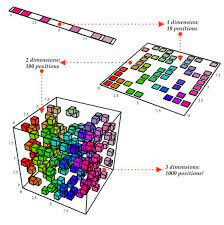

Pengurangan dimensi adalah proses pengurangan jumlah 
variabel atau atribut acak yang sedang dipertimbangkan. 
Reduksi data berdimensi tinggi, sebagai bagian dari 
langkah pra-pemrosesan data, sangat penting dalam 
banyak aplikasi dunia nyata. Pengurangan dimensi tinggi 
telah muncul sebagai salah satu tugas penting dalam 
aplikasi data mining. Misalnya, Anda mungkin memiliki 
kumpulan data dengan ratusan fitur (kolom di database 
Anda). Kemudian reduksi dimensionalitas adalah Anda 
mengurangi fitur atribut data tersebut dengan 
menggabungkan atau menggabungkannya sedemikian 
rupa sehingga tidak akan kehilangan banyak karakteristik 
signifikan dari dataset asli. Salah satu masalah utama yang 
terjadi dengan data berdimensi tinggi secara luas dikenal 
sebagai "Curse of Dimensionality". Ini mendorong kami 
untuk mengurangi dimensi data kami jika kami ingin 
menggunakannya untuk analisis.


# Preprocessing

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Datasets/Data_Cortex_Nuclear.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N  ...  Genotype  Treatment  Behavior   class
0   309_1  0.503644  0.747193  0.430175  ...   Control  Memantine       C/S  c-CS-m
1   309_2  0.514617  0.689064  0.411770  ...   Control  Memantine       C/S  c-CS-m
2   309_3  0.509183  0.730247  0.418309  ...   Control  Memantine       C/S  c-CS-m
3   309_4  0.442107  0.617076  0.358626  ...   Control  Memantine       C/S  c-CS-m
4   309_5  0.434940  0.617430  0.358802  ...   Control  Memantine       C/S  c-CS-m

[5 rows x 82 columns]

In [ ]:
  df.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [ ]:
df = df.drop(['MouseID','Behavior', 'Genotype', 'class'],axis=1)

df = df.fillna(df.mean())
df.head(20)

DYRK1A_N   ITSN1_N    BDNF_N  ...  H3MeK4_N    CaNA_N  Treatment
0   0.503644  0.747193  0.430175  ...  0.128186  1.675652  Memantine
1   0.514617  0.689064  0.411770  ...  0.131119  1.743610  Memantine
2   0.509183  0.730247  0.418309  ...  0.127431  1.926427  Memantine
3   0.442107  0.617076  0.358626  ...  0.146901  1.700563  Memantine
4   0.434940  0.617430  0.358802  ...  0.148380  1.839730  Memantine
5   0.447506  0.628176  0.367388  ...  0.142180  1.816389  Memantine
6   0.428033  0.573696  0.342709  ...  0.157499  1.528484  Memantine
7   0.416923  0.564036  0.327703  ...  0.159409  1.652658  Memantine
8   0.386311  0.538428  0.317720  ...  0.158235  1.834599  Memantine
9   0.380827  0.499294  0.362462  ...  0.192334  1.516862  Memantine
10  0.366511  0.513278  0.327792  ...  0.193055  1.613548  Memantine
11  0.364154  0.499411  0.355124  ...  0.195529  1.722971  Memantine
12  0.364873  0.482102  0.312539  ...  0.214088  1.426934  Memantine
13  0.381911  0.485914  0.310951  ...  0.225285  1.500070  Memantine
14  0.374410  0.462313  0.344629  ...  0.224212  1.613897  Memantine
15  0.743118  0.862653  0.377742  ...  0.163995  1.297220  Memantine
16  0.711480  0.807054  0.351591  ...  0.158206  1.363189  Memantine
17  0.704633  0.802537  0.350110  ...  0.158543  1.404481  Memantine
18  0.677359  0.770235  0.356397  ...  0.195739  1.170038  Memantine
19  0.591572  0.678768  0.312480  ...  0.169977  1.272986  Memantine

[20 rows x 78 columns]

In [ ]:
 df.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Treatment    0
Length: 78, dtype: int64

In [ ]:
df["Treatment"].value_counts()


Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [ ]:
#category = pd.get_dummies(df.Treatment)
#df_baru = pd.concat([df, category], axis=1)
#df_baru = df_baru.drop(columns='Treatment')
#df_baru

In [ ]:
cleanup_nums = {"Treatment":     {"Memantine": 1.0, "Saline": 2.0}}
df.replace(cleanup_nums, inplace=True)
df.head()
df.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Treatment    float64
Length: 78, dtype: object

In [ ]:
X = df.drop("Treatment",1)   #Feature Matrix
y = df["Treatment"]          #Target Variable
df.head()
print(X)
column_name = list(X.columns) 

      DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0     0.503644  0.747193  0.430175  ...  0.131790  0.128186  1.675652
1     0.514617  0.689064  0.411770  ...  0.135103  0.131119  1.743610
2     0.509183  0.730247  0.418309  ...  0.133362  0.127431  1.926427
3     0.442107  0.617076  0.358626  ...  0.147444  0.146901  1.700563
4     0.434940  0.617430  0.358802  ...  0.140314  0.148380  1.839730
...        ...       ...       ...  ...       ...       ...       ...
1075  0.254860  0.463591  0.254860  ...  0.204660  0.328327  1.364823
1076  0.272198  0.474163  0.251638  ...  0.200415  0.293435  1.364478
1077  0.228700  0.395179  0.234118  ...  0.229193  0.355213  1.430825
1078  0.221242  0.412894  0.243974  ...  0.251317  0.365353  1.404031
1079  0.302626  0.461059  0.256564  ...  0.252995  0.365278  1.370999

[1080 rows x 77 columns]


In [ ]:
df.describe()

DYRK1A_N      ITSN1_N  ...       CaNA_N    Treatment
count  1080.000000  1080.000000  ...  1080.000000  1080.000000
mean      0.425810     0.617102  ...     1.337784     1.472222
std       0.249015     0.251290  ...     0.317126     0.499459
min       0.145327     0.245359  ...     0.586479     1.000000
25%       0.288163     0.473669  ...     1.081423     1.000000
50%       0.366540     0.566365  ...     1.317441     1.000000
75%       0.487574     0.697500  ...     1.585824     2.000000
max       2.516367     2.602662  ...     2.129791     2.000000

[8 rows x 78 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [ ]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0  0.151122  0.212885  0.824638  ...  0.102890  0.084580  0.705738
1  0.155750  0.188226  0.776455  ...  0.115874  0.093977  0.749771
2  0.153459  0.205696  0.793572  ...  0.109050  0.082162  0.868229
3  0.125169  0.157688  0.637326  ...  0.164241  0.144543  0.721879
4  0.122146  0.157838  0.637787  ...  0.136298  0.149281  0.812053

[5 rows x 77 columns]

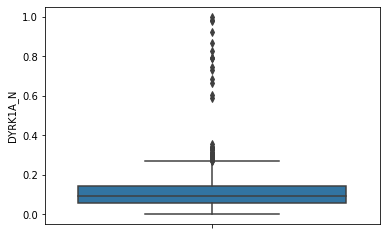

In [ ]:
import seaborn as sns
sns.boxplot(y=df['DYRK1A_N'])

In [ ]:
df = pd.concat([df, y], axis = 1)
df.head()

DYRK1A_N   ITSN1_N    BDNF_N  ...  H3MeK4_N    CaNA_N  Treatment
0  0.151122  0.212885  0.824638  ...  0.084580  0.705738        1.0
1  0.155750  0.188226  0.776455  ...  0.093977  0.749771        1.0
2  0.153459  0.205696  0.793572  ...  0.082162  0.868229        1.0
3  0.125169  0.157688  0.637326  ...  0.144543  0.721879        1.0
4  0.122146  0.157838  0.637787  ...  0.149281  0.812053        1.0

[5 rows x 78 columns]

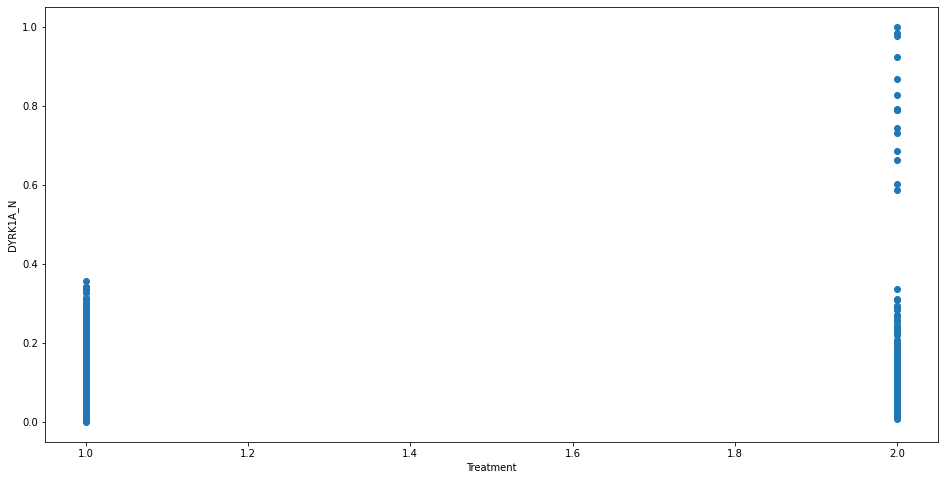

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Treatment'], df['DYRK1A_N'])
ax.set_xlabel('Treatment')
ax.set_ylabel('DYRK1A_N')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

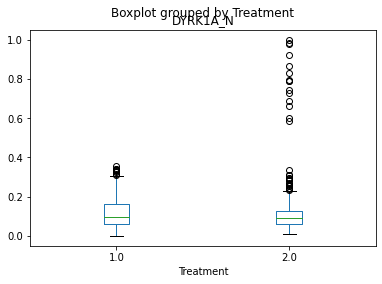

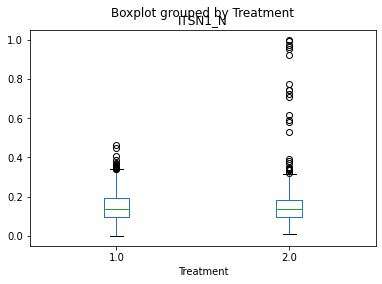

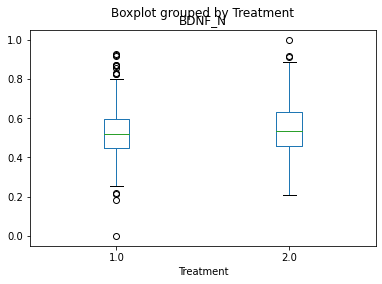

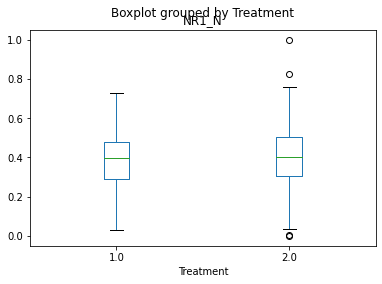

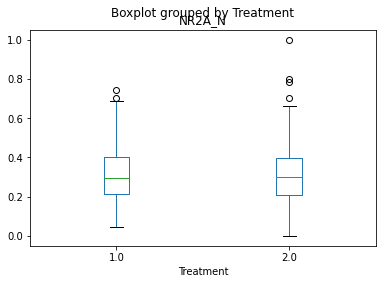

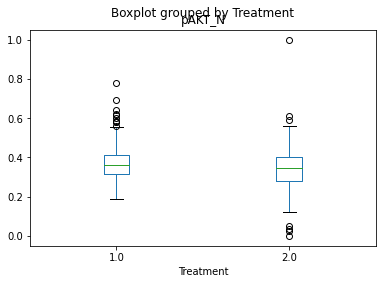

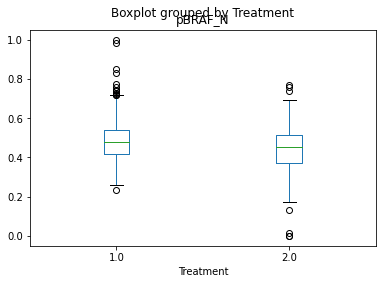

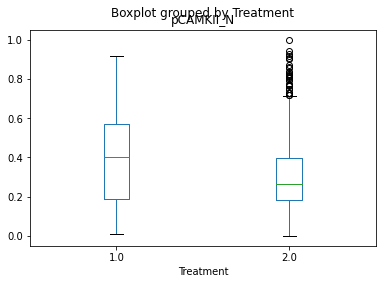

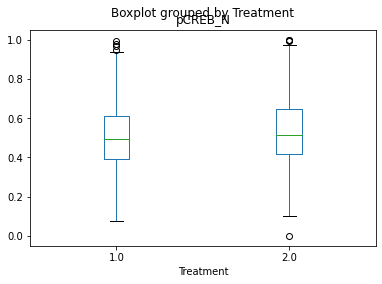

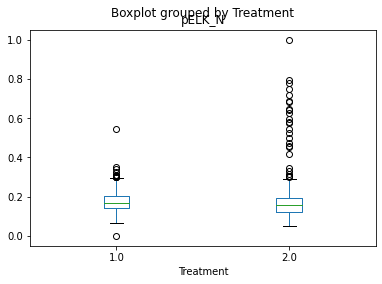

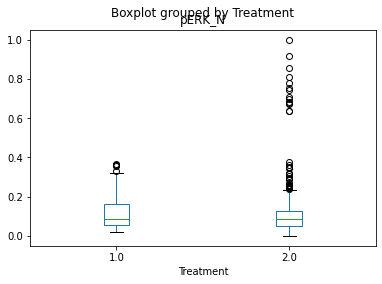

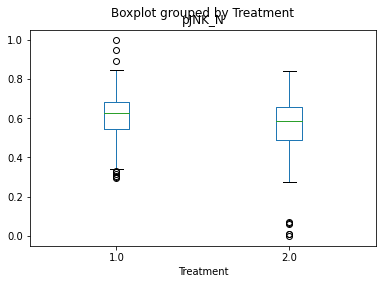

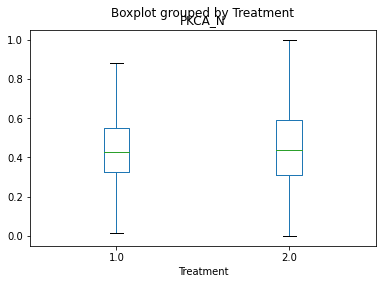

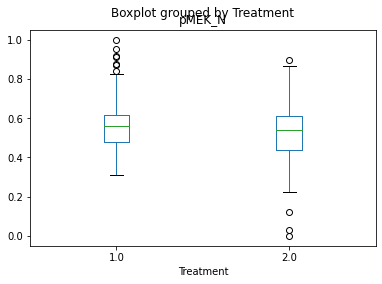

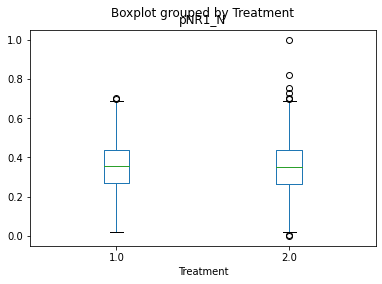

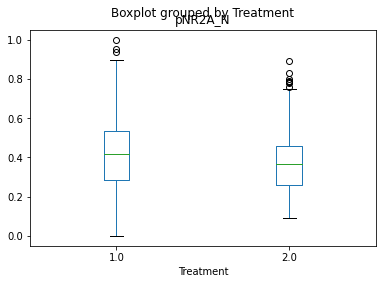

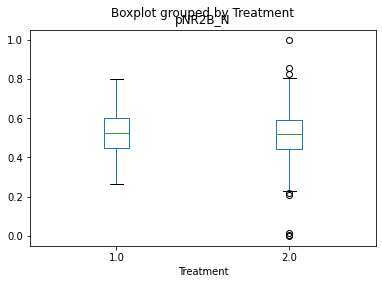

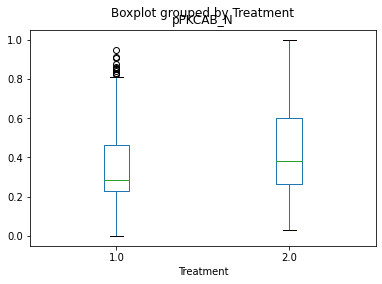

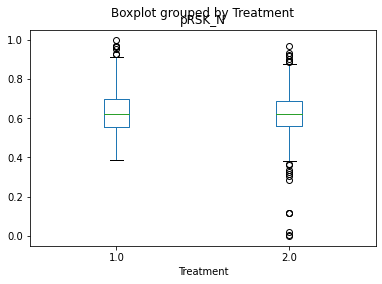

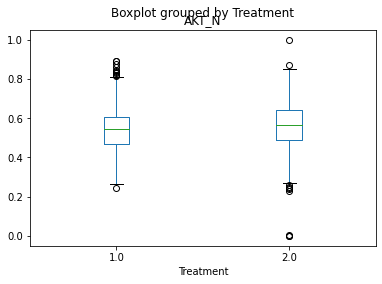

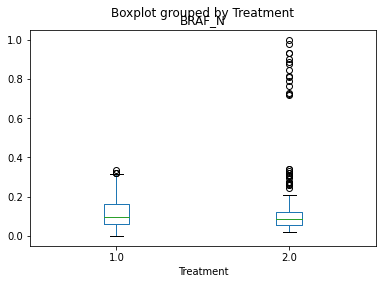

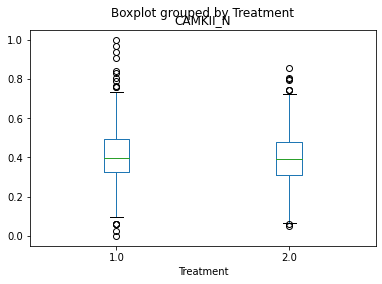

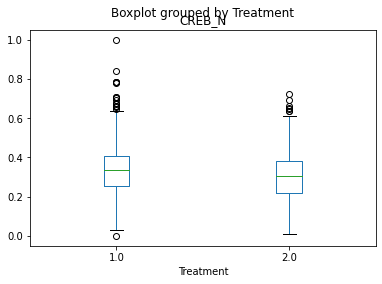

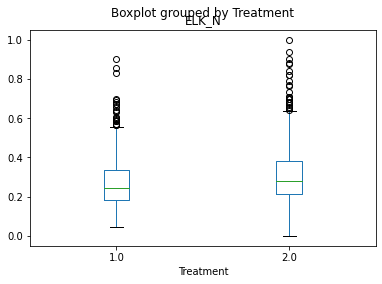

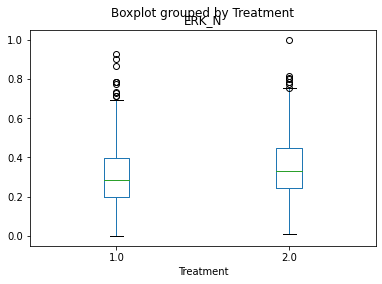

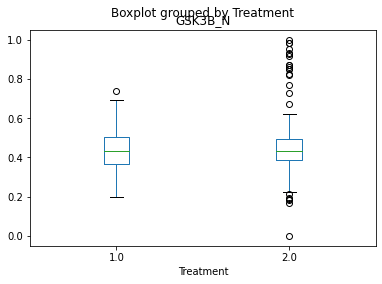

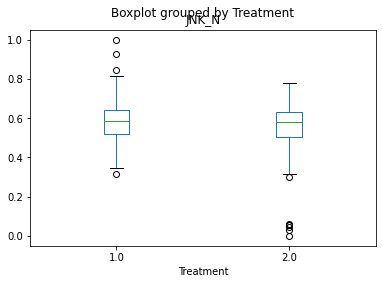

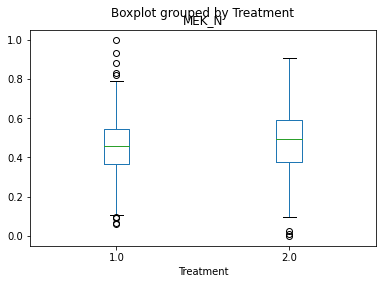

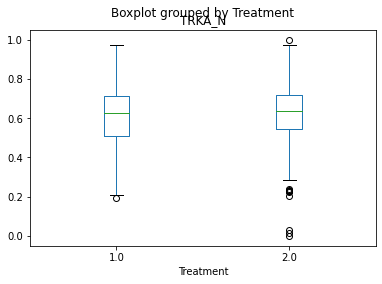

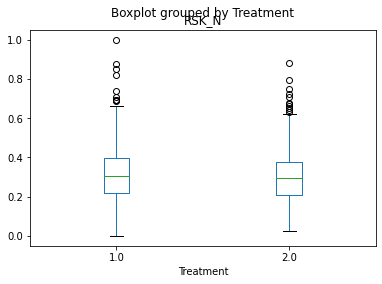

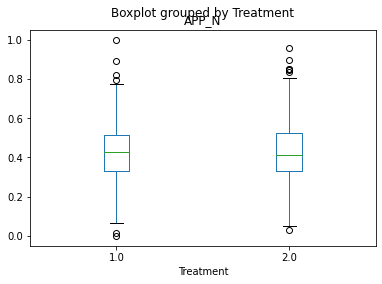

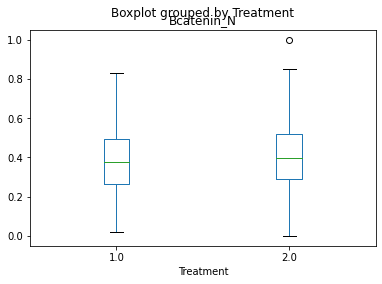

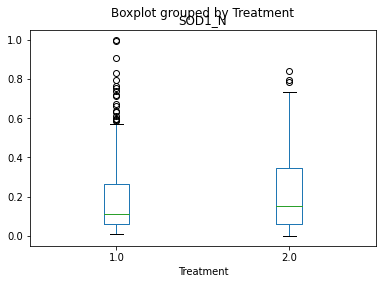

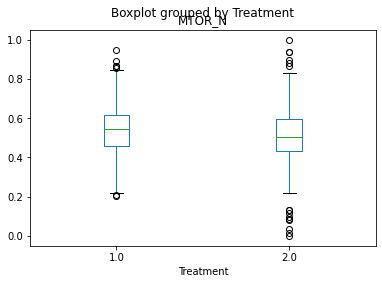

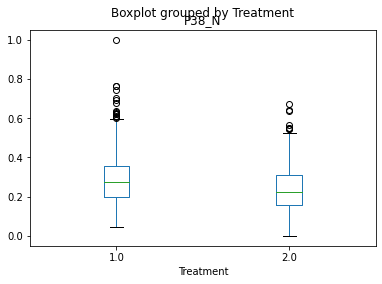

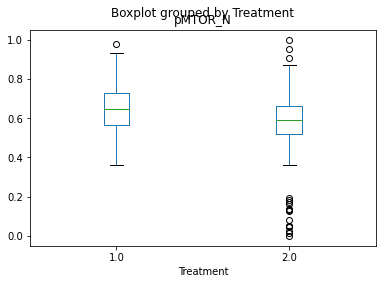

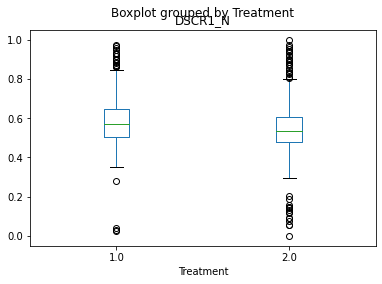

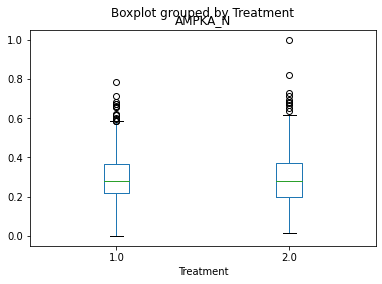

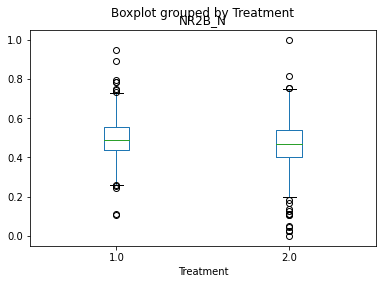

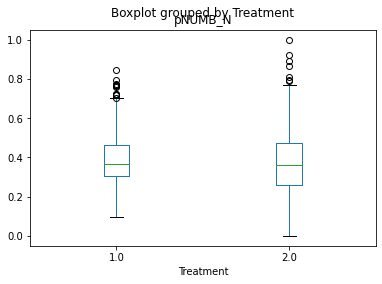

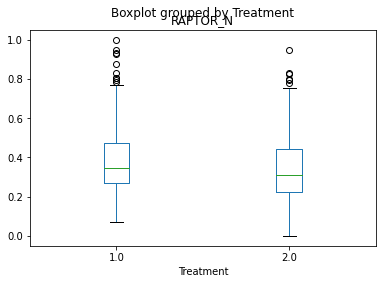

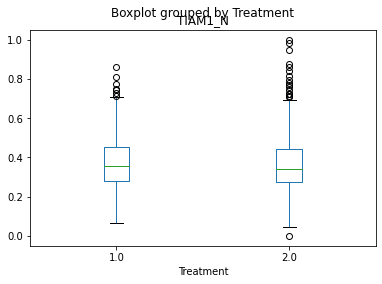

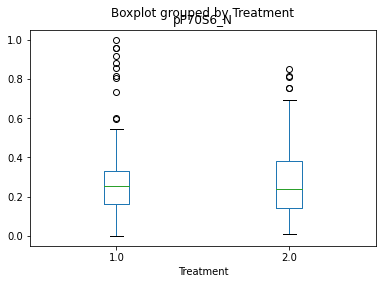

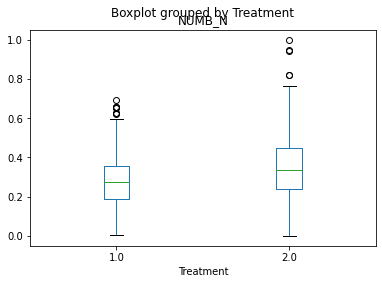

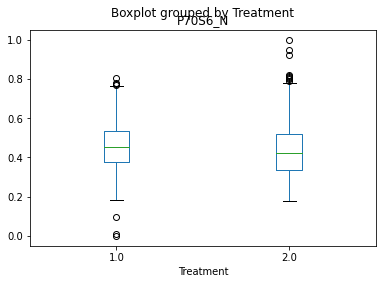

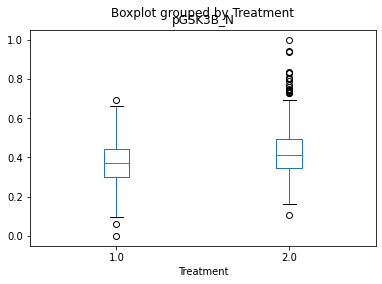

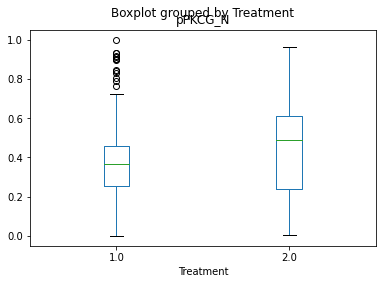

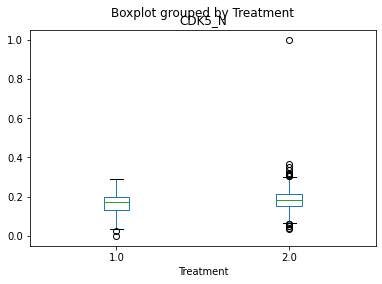

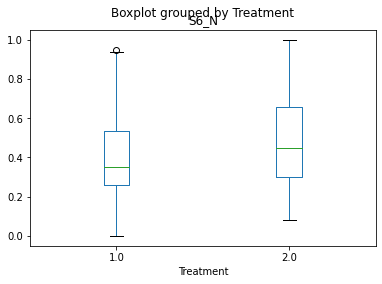

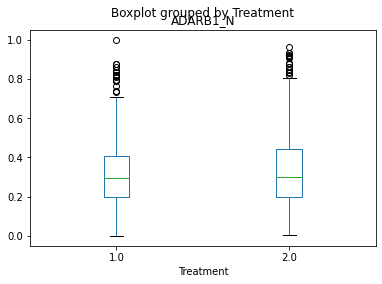

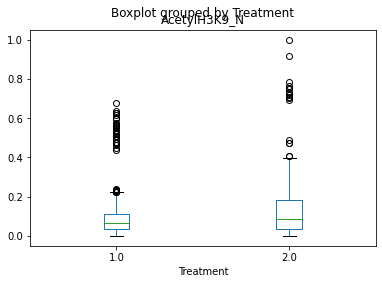

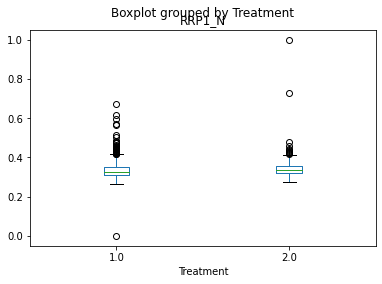

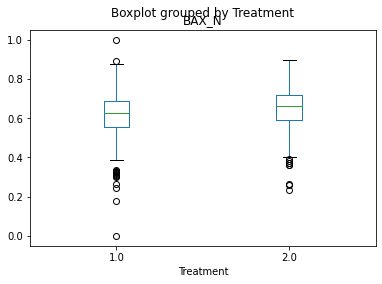

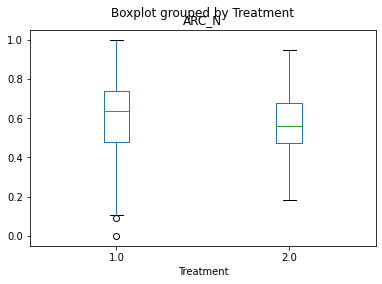

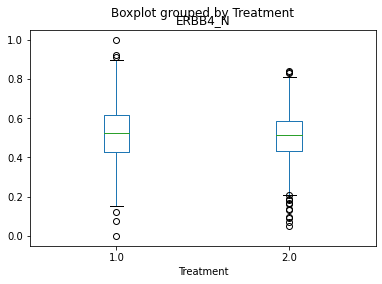

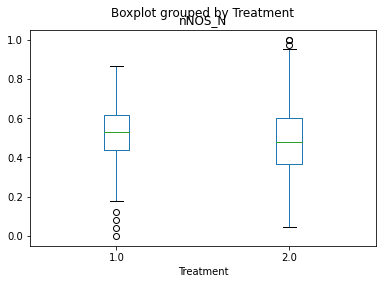

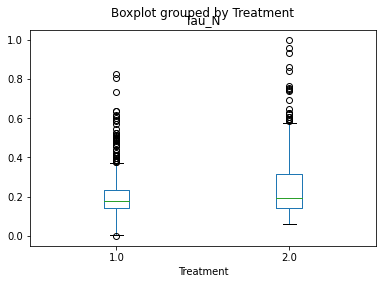

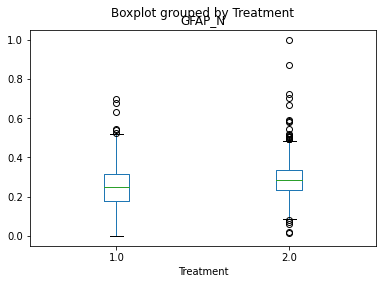

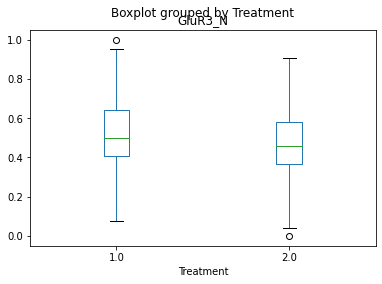

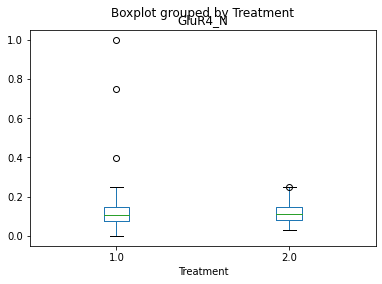

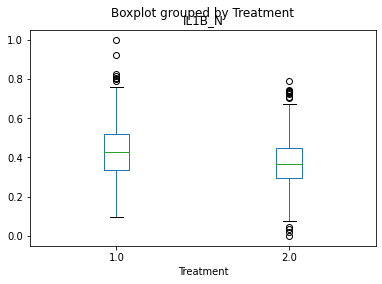

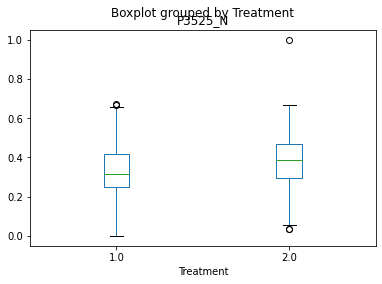

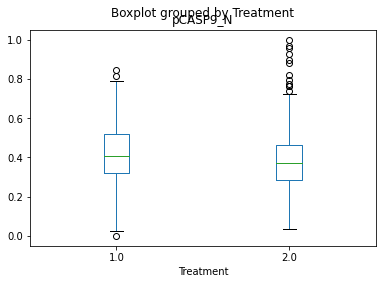

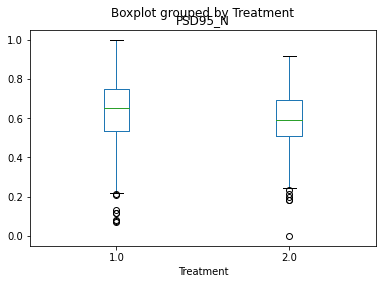

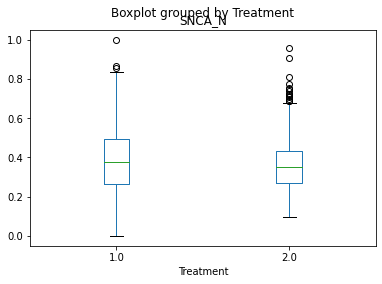

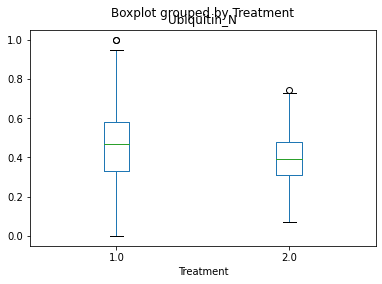

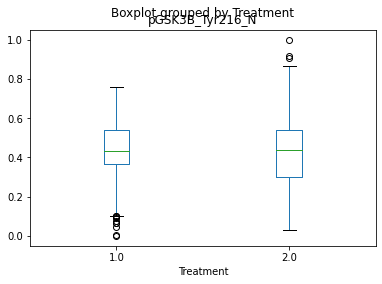

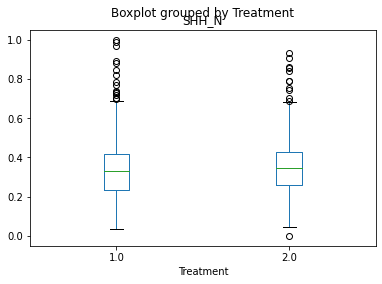

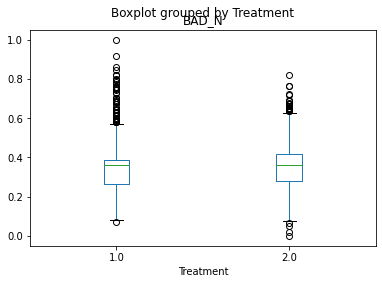

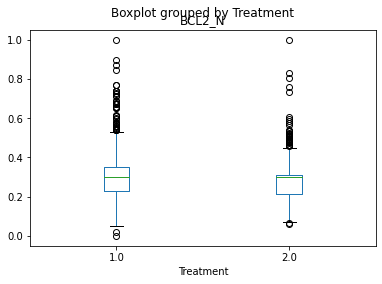

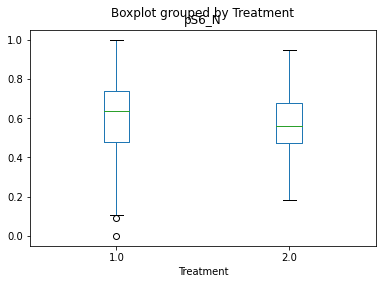

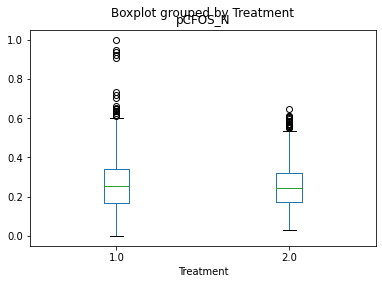

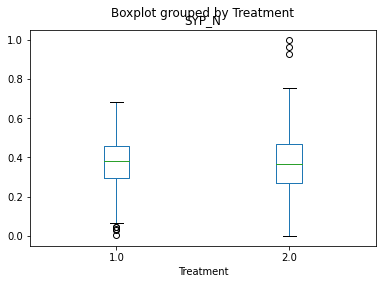

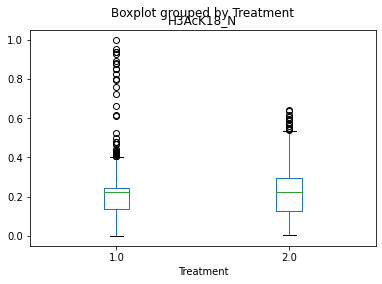

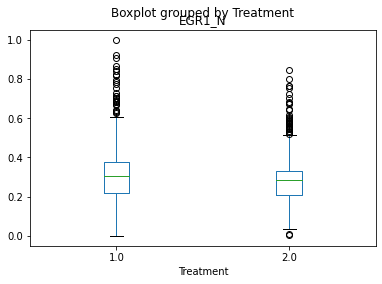

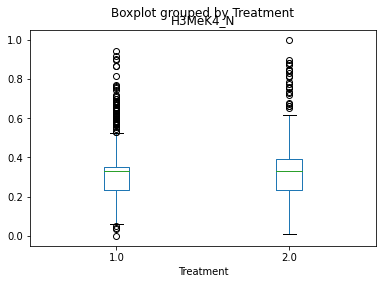

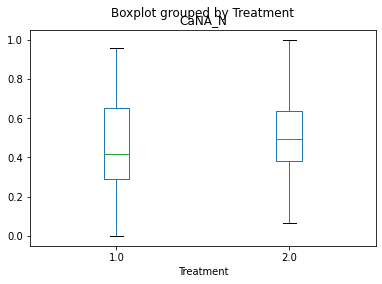

In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

x = df.drop("Treatment",1)
columns_name = list(x.columns)

for i in column_name:
  df.boxplot(by ='Treatment', column =[i], grid = False) 
  

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DYRK1A_N     0.084103
ITSN1_N      0.094952
BDNF_N       0.158094
NR1_N        0.193209
NR2A_N       0.187519
               ...   
H3AcK18_N    0.132987
EGR1_N       0.144874
H3MeK4_N     0.144086
CaNA_N       0.326830
Treatment    1.000000
Length: 78, dtype: float64


In [ ]:
print(df.shape)

(1080, 78)


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(543, 78)


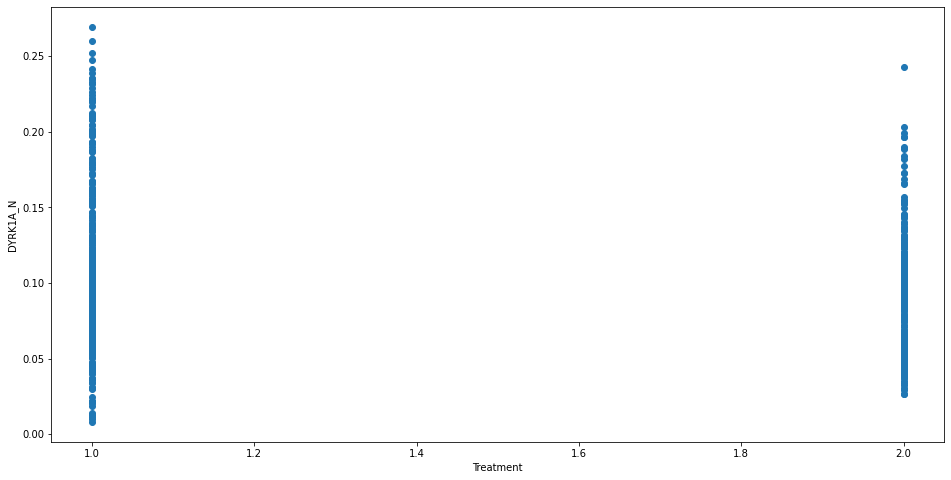

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['Treatment'], df_out['DYRK1A_N'])
ax.set_xlabel('Treatment')
ax.set_ylabel('DYRK1A_N')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

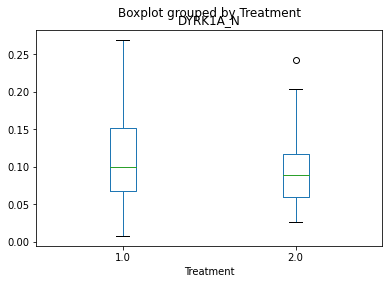

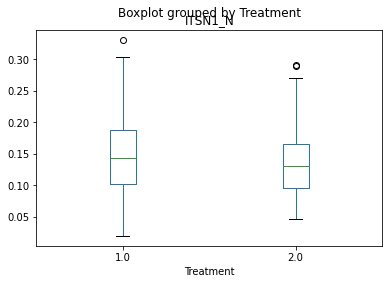

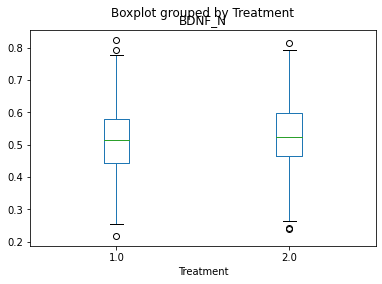

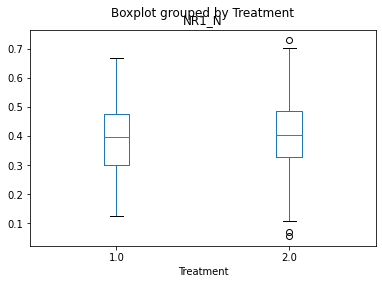

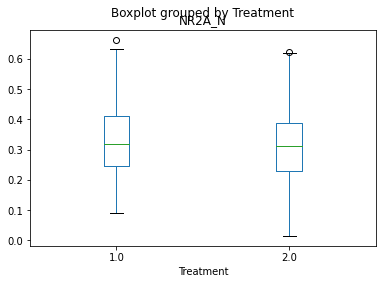

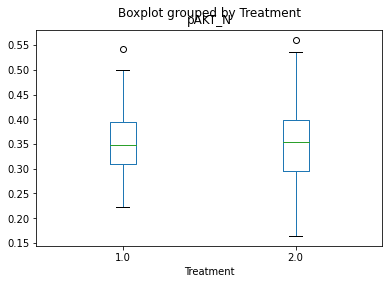

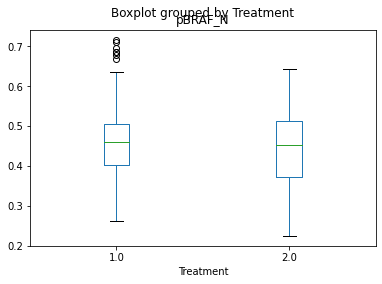

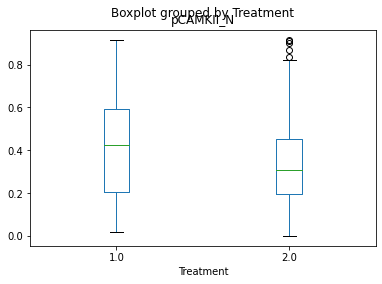

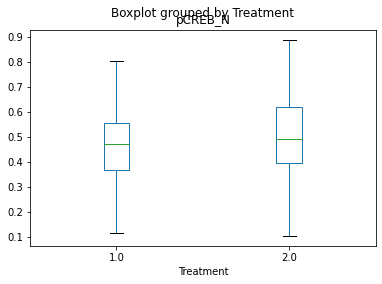

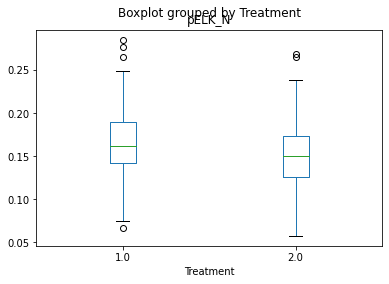

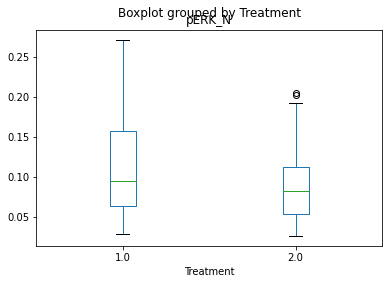

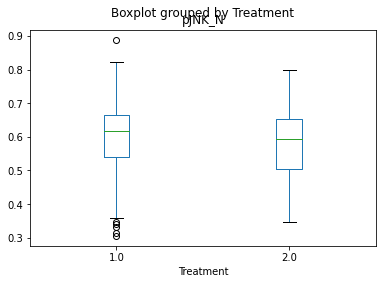

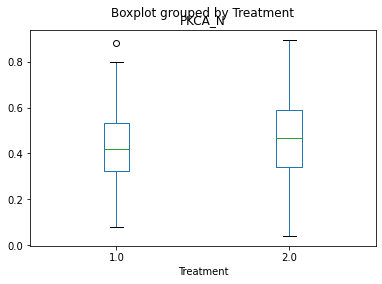

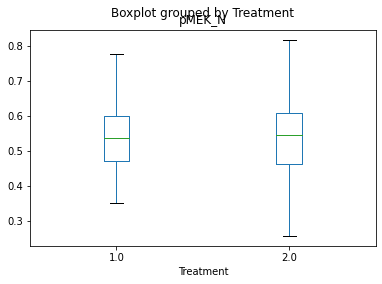

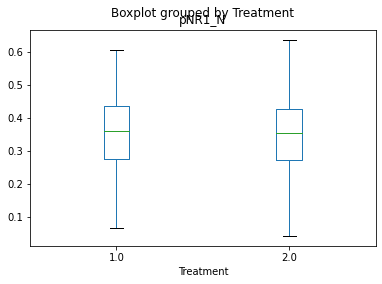

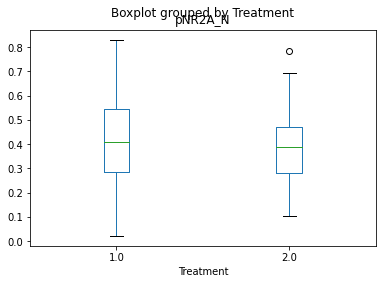

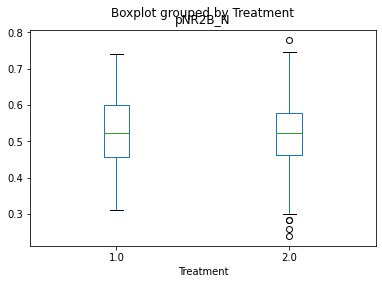

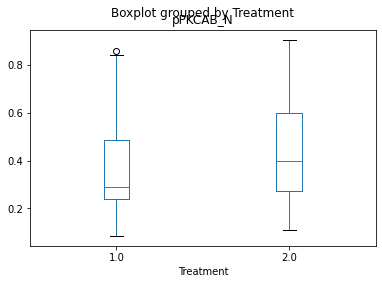

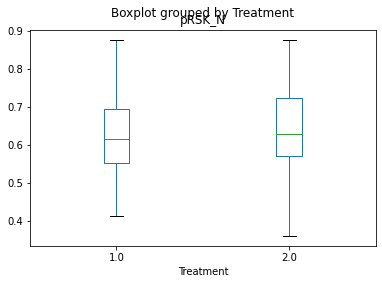

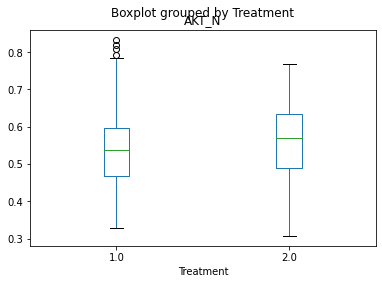

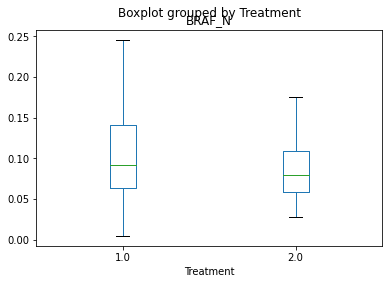

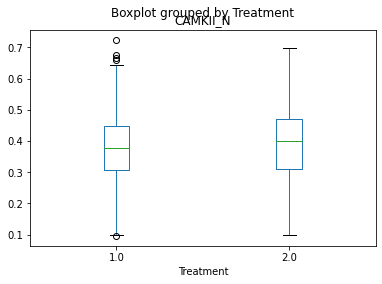

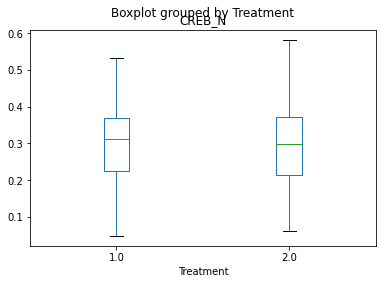

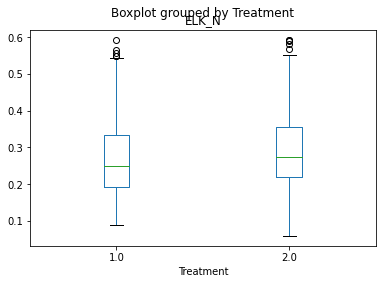

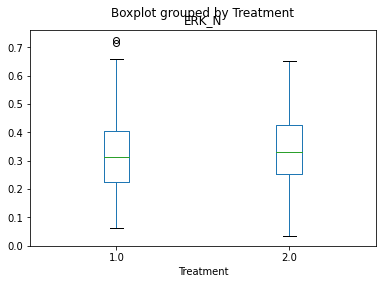

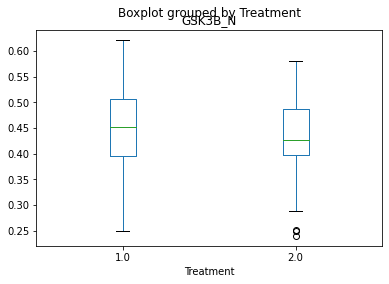

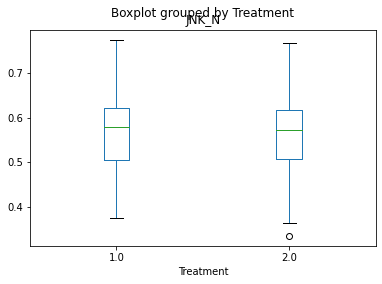

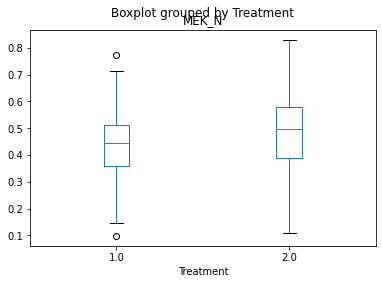

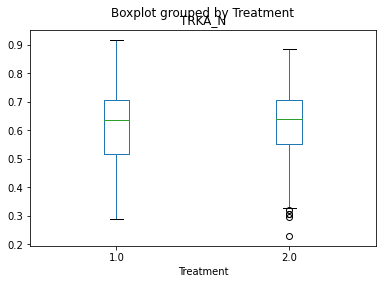

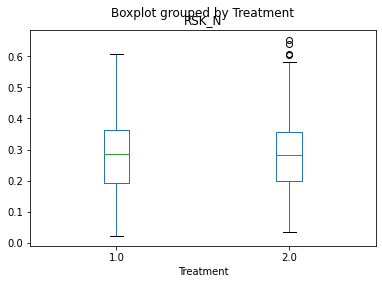

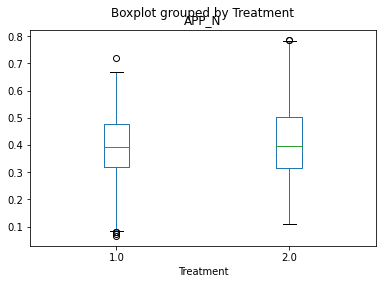

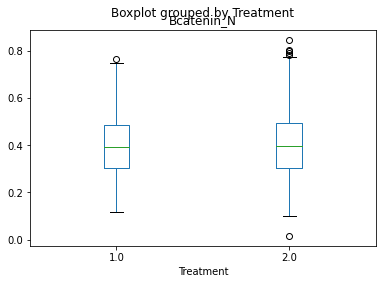

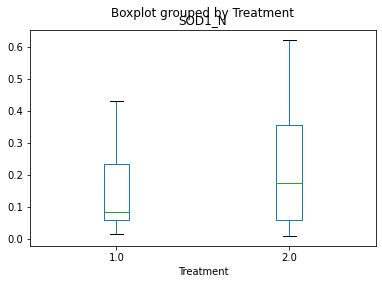

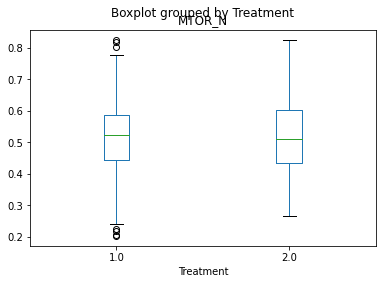

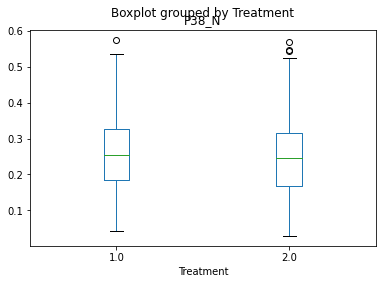

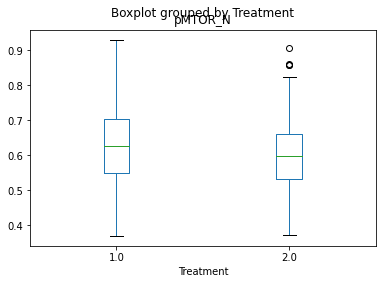

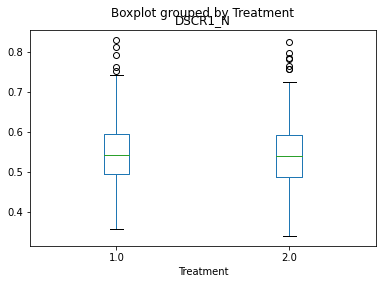

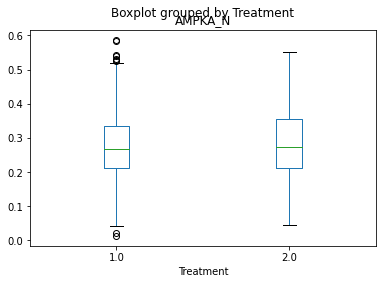

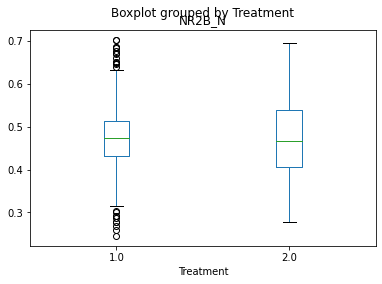

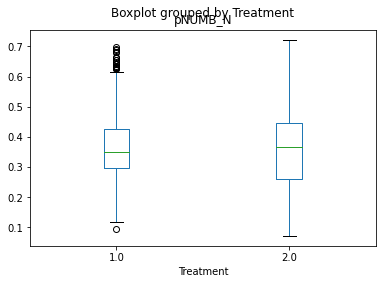

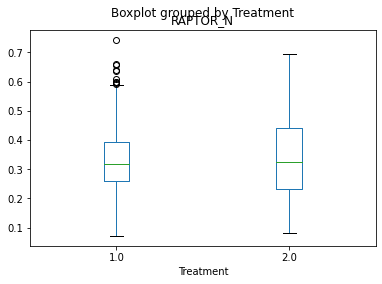

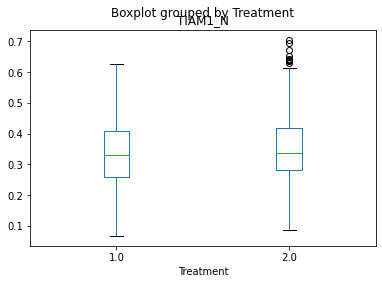

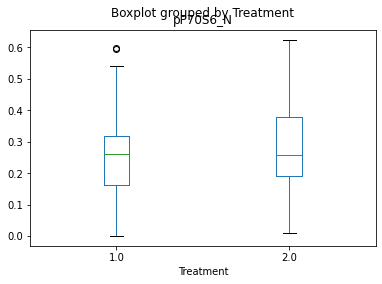

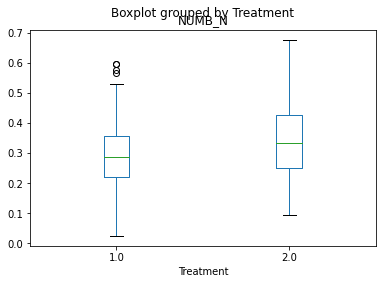

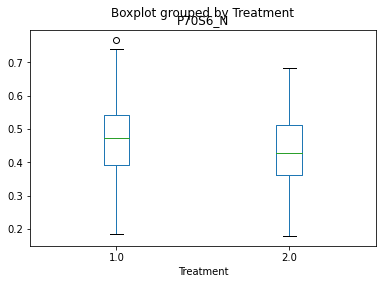

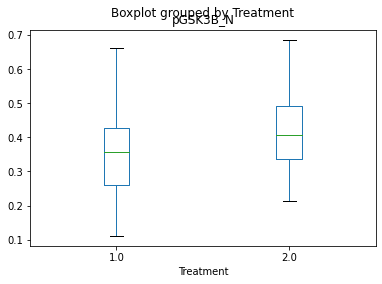

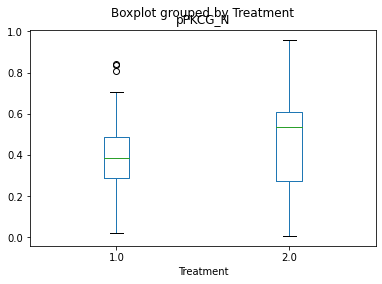

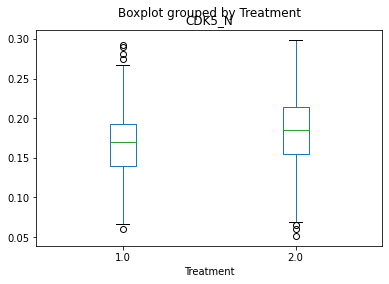

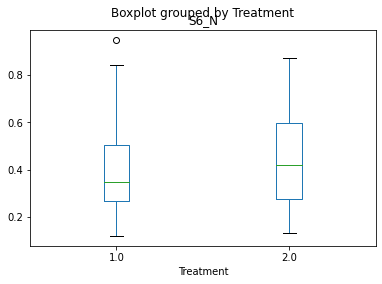

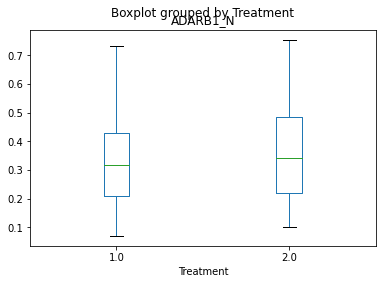

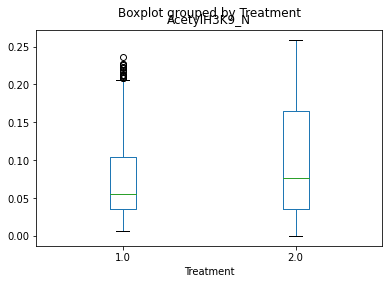

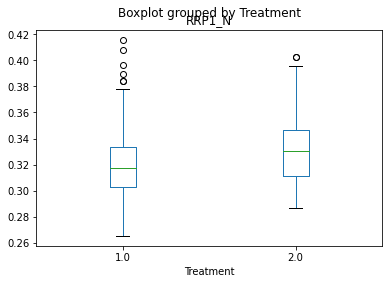

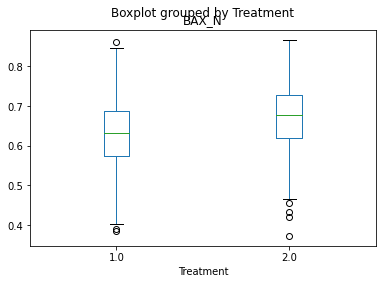

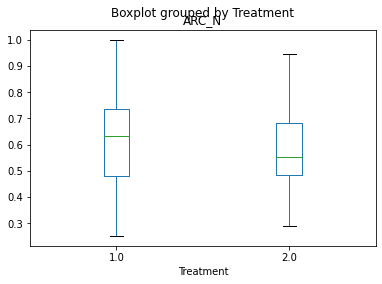

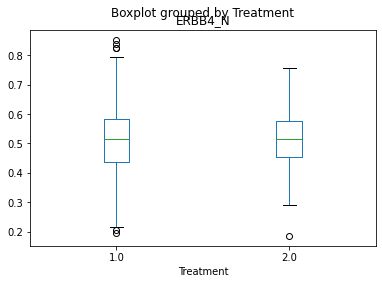

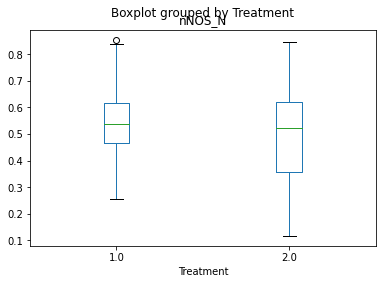

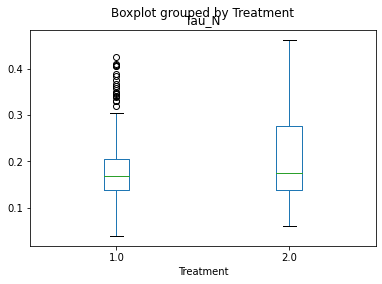

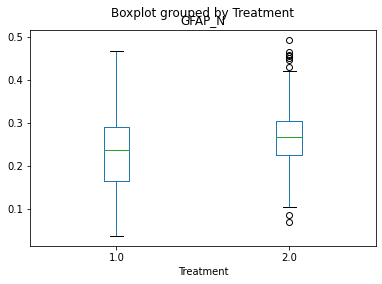

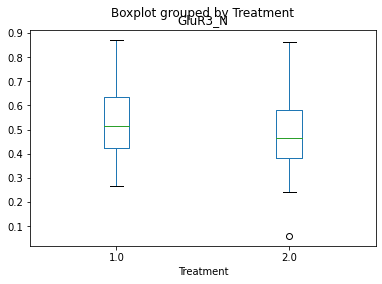

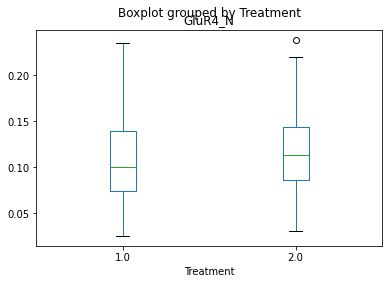

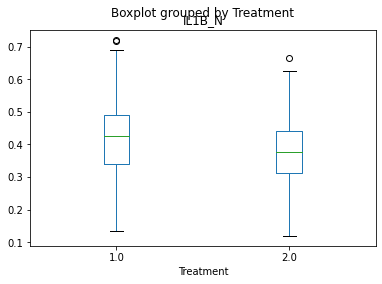

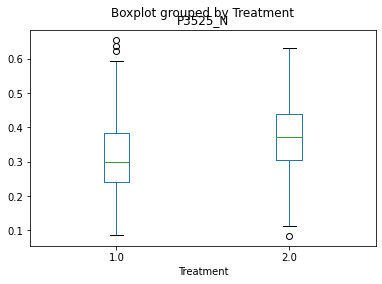

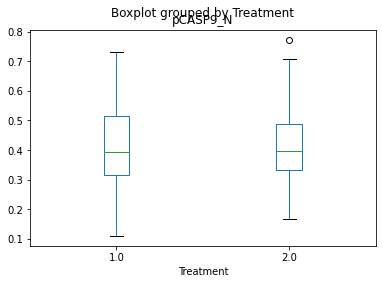

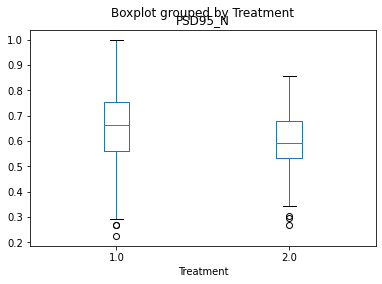

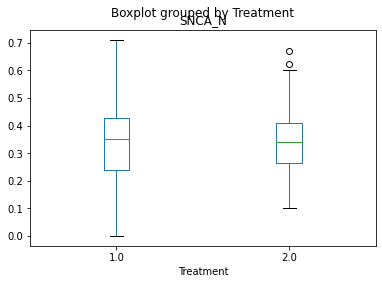

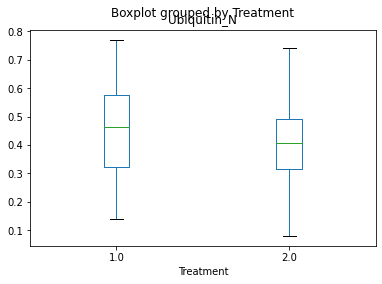

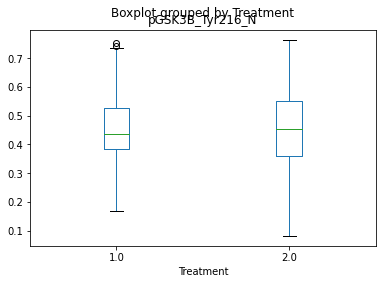

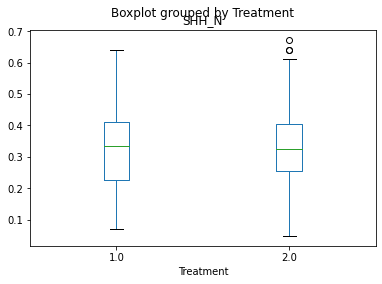

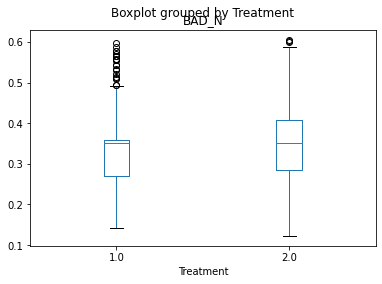

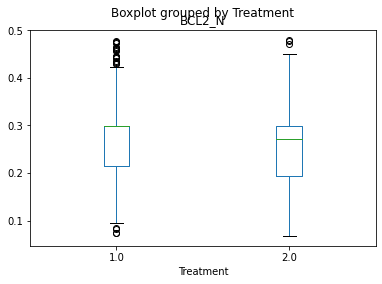

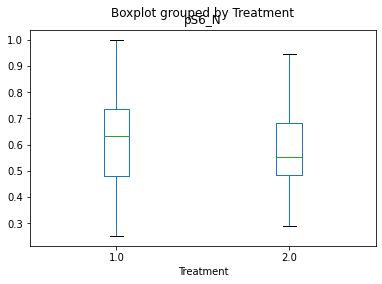

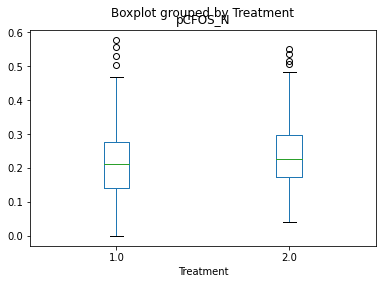

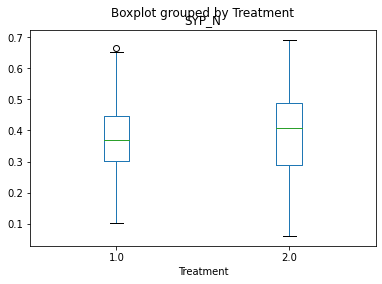

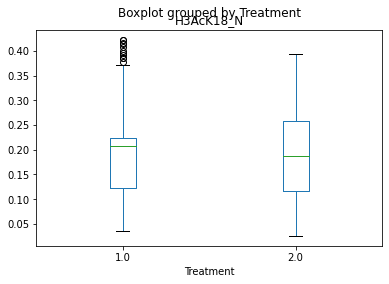

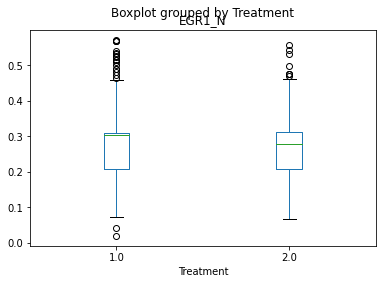

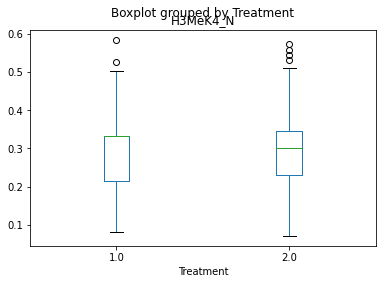

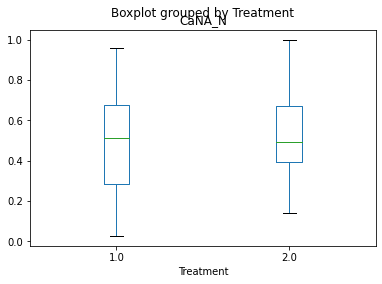

In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

X_fix = df_out.drop("Treatment",1)
y_fix = df_out["Treatment"]
columns_name = list(X_fix.columns)

for i in column_name:
  df_out.boxplot(by ='Treatment', column =[i], grid = False) 
  

In [ ]:
#X_fix = df_out.drop('Treatment',1)

# Feature Importance

1. Univariate Selection

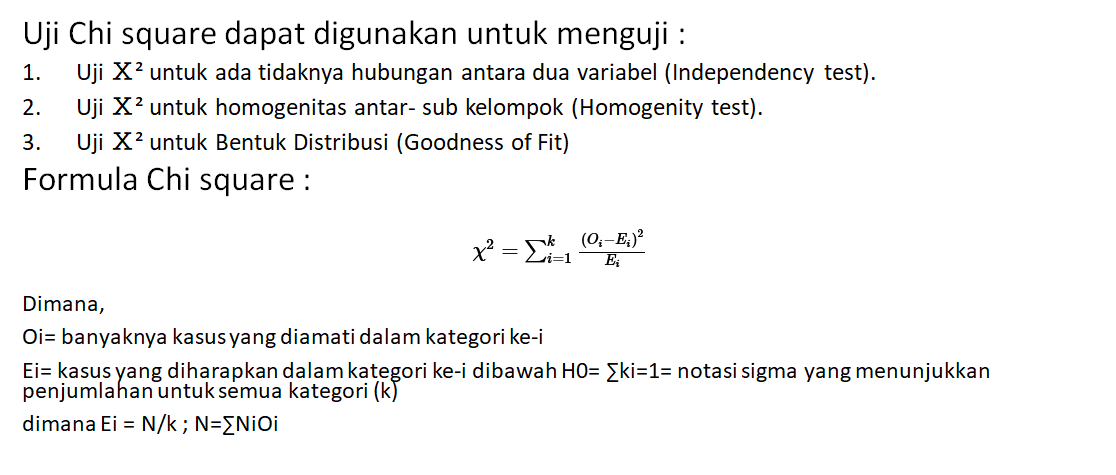

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_out.iloc[:,0:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_fix.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Protein Name','chi-square Score', 'p-values']  #naming the dataframe columns
print(featureScores.nlargest(77,'chi-square Score'))  #print 10 best features

   Protein Name  chi-square Score  p-values
32       SOD1_N          2.801675  0.094166
46      pPKCG_N          2.734290  0.098215
7     pCAMKII_N          1.898900  0.168202
17     pPKCAB_N          1.661953  0.197340
45     pGSK3B_N          1.409616  0.235120
..          ...               ...       ...
29        RSK_N          0.002484  0.960251
73    H3AcK18_N          0.001596  0.968136
62     pCASP9_N          0.000075  0.993098
54      ERBB4_N          0.000012  0.997200
64       SNCA_N          0.000001  0.999087

[77 rows x 3 columns]


2. SVM-RFE

In [ ]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from operator import itemgetter

X = df_out.iloc[:,0:77]
y = df_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

colnames = X.columns
n_features_to_select = 1
svclassifier = SVC(kernel='linear')
rfe = RFE(svclassifier, n_features_to_select, verbose = 1)
rfe.fit(X, y)

y_pred = rfe.predict(X)

ranks[f"RFE score"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 fe

In [ ]:
# Put the mean scores into a Pandas dataframe
df_rank = pd.DataFrame(list(ranks[f"RFE score"].items()), columns= ['Feature','Scores'])

# Sort the dataframe
df_rank = df_rank.sort_values('Scores', ascending=False)

In [ ]:
df_rank

Feature  Scores
61     P3525_N    1.00
32      SOD1_N    0.99
55      nNOS_N    0.97
17    pPKCAB_N    0.96
25     GSK3B_N    0.95
..         ...     ...
31  Bcatenin_N    0.05
53       ARC_N    0.04
70       pS6_N    0.03
34       P38_N    0.01
54     ERBB4_N    0.00

[77 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


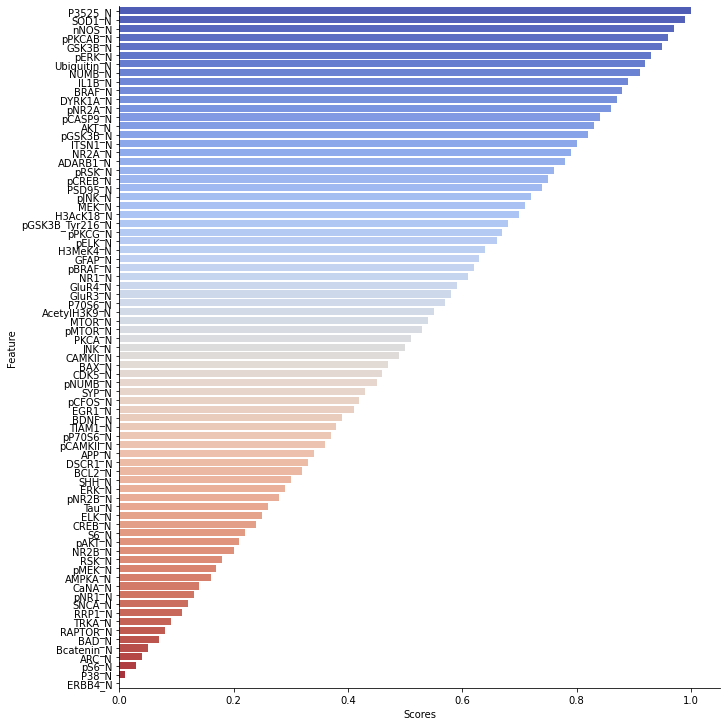

In [ ]:
import seaborn as sns
# Let's plot the ranking of the features
sns.factorplot(x="Scores", y="Feature", data = df_rank, kind="bar", 
               size=10, aspect=1, palette='coolwarm')

3. Extratrees

[0.01691316 0.01022384 0.00745616 0.00921149 0.00566747 0.01072055
 0.00761626 0.02568468 0.00819187 0.0099136  0.02628544 0.01299515
 0.01098036 0.00806038 0.00838525 0.01113199 0.00695821 0.01680631
 0.01359915 0.01652543 0.02979717 0.00733467 0.00861742 0.0071668
 0.00890195 0.00936681 0.00785165 0.0113376  0.00693518 0.00792507
 0.01225181 0.0058992  0.05015772 0.01208846 0.00850011 0.01181148
 0.0098895  0.00738264 0.01170776 0.01943452 0.00973143 0.0103227
 0.01846012 0.01384663 0.01502401 0.02162336 0.03500786 0.01324235
 0.01197352 0.01193126 0.02450228 0.0104739  0.01217607 0.00873244
 0.00626928 0.02871015 0.01823466 0.01451836 0.01189296 0.01021958
 0.01212248 0.01729783 0.01021512 0.0130171  0.0069811  0.02009426
 0.01236179 0.00979871 0.00896132 0.00679014 0.00957571 0.00657392
 0.0106244  0.01750495 0.00632346 0.00902796 0.01815255]


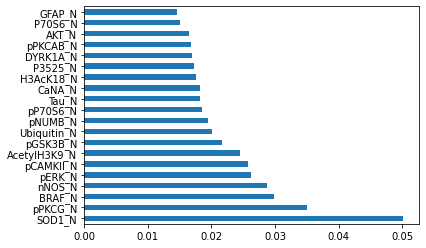

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_fix,y_fix)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

4. Correlation Matrix with 
Heatmap

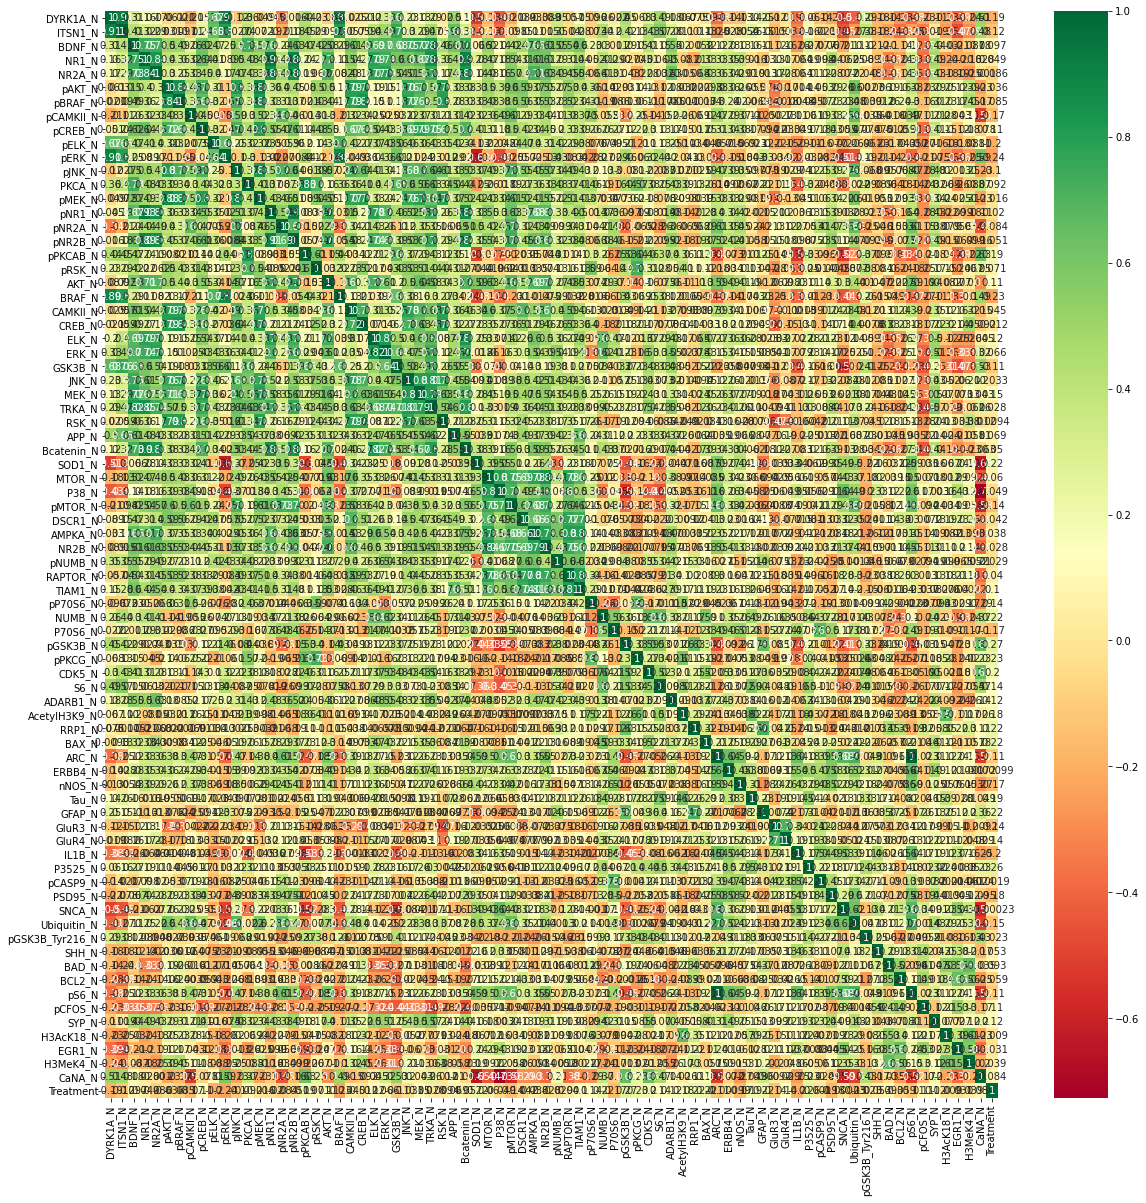

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = df_out.iloc[:,0:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset

corrmat = df_out.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_out[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Feature Extraction

1. LDA

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import offsetbox
# from sklearn import manifold, datasets, decomposition, discriminant_analysis

# digits = datasets.load_digits()

# X = digits.data
# y = digits.target

# n_samples, n_features = X.shape

In [ ]:
# def embedding_plot(X, title):
#     x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
#     X = (X - x_min) / (x_max - x_min)
#     plt.figure()
#     ax = plt.subplot(aspect='equal')
#     sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)
#     shown_images = np.array([[1., 1.]])
#     for i in range(X.shape[0]):
#         if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
#         shown_images = np.r_[shown_images, [X[i]]]
#         ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
#     plt.xticks([]), plt.yticks([])
#     plt.title(title)

In [ ]:
# X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
# embedding_plot(X_lda, "LDA")
# plt.show()

In [ ]:
# X_lda

In [ ]:
#first reduxe de dimensin
from sklearn import manifold, datasets, decomposition, discriminant_analysis

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)

lda_df = pd.DataFrame(data = lda
             , columns = ['new_var1', 'new_var2'])
finalDf = pd.concat([lda_df, y_fix], axis = 1)
finalDf.head()

new_var1  new_var2  Treatment
0 -2.014632 -5.623486        1.0
1  0.220967  3.592400        1.0
2  2.234855  2.709504        1.0
3  2.760965 -0.624427        1.0
4 -5.845449  1.754015        1.0

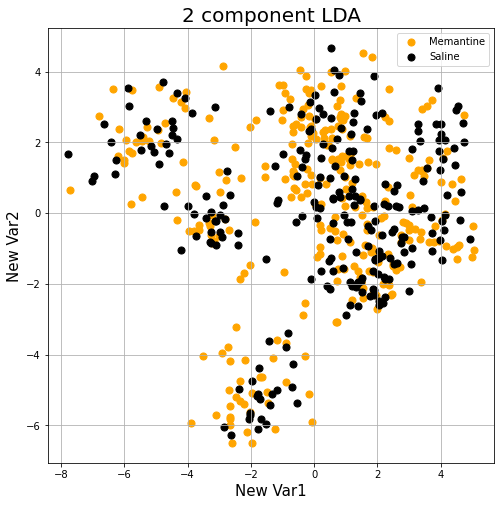

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('New Var1', fontsize = 15)
ax.set_ylabel('New Var2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = [1.0,2.0]
colors = ['orange', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Treatment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'new_var1']
               , finalDf.loc[indicesToKeep, 'new_var2']
               , c = color
               , s = 50)
ax.legend(["Memantine", "Saline"])
ax.grid()



2. PCA

In [ ]:
#first reduxe de dimensin
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_fix)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_fix], axis = 1)
finalDf.head()

principal component 1  principal component 2  Treatment
0               0.346571              -0.812245        1.0
1               0.145660              -0.726097        1.0
2               0.137620              -0.782647        1.0
3              -0.158808              -0.591789        1.0
4              -0.293129              -0.565051        1.0

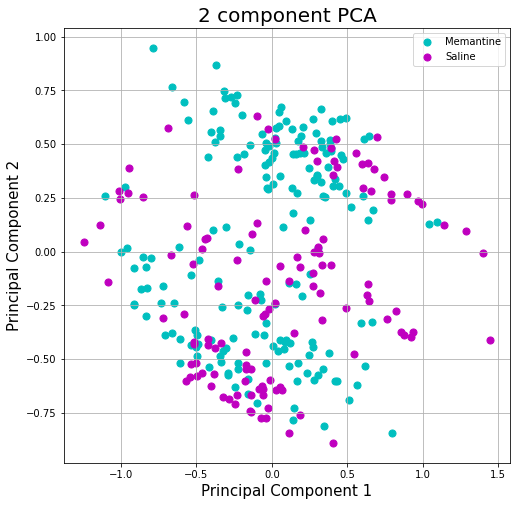

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0,2.0]
colors = ['c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Treatment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Memantine", "Saline"])
ax.grid()



3. t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
X_2d = tsne.fit_transform(X_fix)

In [ ]:
print(X_2d)


[[-15.619028  18.994883]
 [-16.023829  19.062391]
 [-16.060951  19.174597]
 ...
 [ 16.219675  13.25039 ]
 [ 15.75843   13.641496]
 [ 15.136779  13.996893]]


In [ ]:
new_df = pd.DataFrame(data = X_2d
             , columns = ['feature 1', 'feature 2'])
tsne_df = pd.concat([new_df, y_fix], axis = 1)
tsne_df.head()

feature 1  feature 2  Treatment
0 -15.619028  18.994883        1.0
1 -16.023829  19.062391        1.0
2 -16.060951  19.174597        1.0
3 -17.704325  18.707098        1.0
4 -18.267902  18.879303        1.0

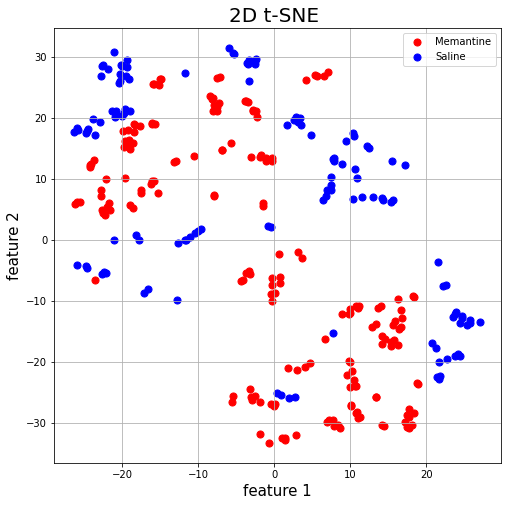

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature 2', fontsize = 15)
ax.set_title('2D t-SNE ', fontsize = 20)
targets = [1.0,2.0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['Treatment'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'feature 1']
               , tsne_df.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
ax.legend(["Memantine", "Saline"])
ax.grid()

